## החלקה על מוט עגלה

> **בעיה**: אם פיטר רוצה לברוח מהזאב, הוא צריך להיות מהיר יותר ממנו. נראה כיצד פיטר יכול ללמוד להחליק, ובפרט, לשמור על שיווי משקל, באמצעות Q-Learning.

ראשית, נתקין את gym ונייבא את הספריות הנדרשות:


In [1]:
#code block 1

## צור סביבה של מוט עגלה


In [ ]:
#code block 2

כדי לראות כיצד הסביבה פועלת, בואו נריץ סימולציה קצרה ל-100 צעדים.


In [ ]:
#code block 3

במהלך הסימולציה, אנו צריכים לקבל תצפיות על מנת להחליט כיצד לפעול. למעשה, פונקציית `step` מחזירה לנו את התצפיות הנוכחיות, פונקציית התגמול, ודגל ה-`done` שמציין האם יש טעם להמשיך את הסימולציה או לא:


In [ ]:
#code block 4

אנחנו יכולים לקבל את הערך המינימלי והמקסימלי של המספרים האלה:


In [5]:
#code block 5

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


In [6]:
#code block 6

בואו גם נחקור שיטת דיסקרטיזציה אחרת באמצעות תאים:


In [7]:
#code block 7

Sample bins for interval (-5,5) with 10 bins
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


בואו נריץ כעת סימולציה קצרה ונצפה בערכי הסביבה הבדידים הללו.


In [8]:
#code block 8

(0, 0, -2, -2)
(0, 1, -2, -5)
(0, 2, -3, -8)
(0, 3, -5, -11)
(0, 3, -7, -14)
(0, 4, -10, -17)
(0, 3, -14, -15)
(0, 3, -17, -12)
(0, 3, -20, -16)
(0, 4, -23, -19)


## מבנה טבלת Q


In [12]:
#code block 9

In [13]:
#code block 10

In [14]:
#code block 11

0: 22.0, alpha=0.3, epsilon=0.9
5000: 70.1384, alpha=0.3, epsilon=0.9
10000: 121.8586, alpha=0.3, epsilon=0.9
15000: 149.6368, alpha=0.3, epsilon=0.9
20000: 168.2782, alpha=0.3, epsilon=0.9
25000: 196.7356, alpha=0.3, epsilon=0.9
30000: 220.7614, alpha=0.3, epsilon=0.9
35000: 233.2138, alpha=0.3, epsilon=0.9
40000: 248.22, alpha=0.3, epsilon=0.9
45000: 264.636, alpha=0.3, epsilon=0.9
50000: 276.926, alpha=0.3, epsilon=0.9
55000: 277.9438, alpha=0.3, epsilon=0.9
60000: 248.881, alpha=0.3, epsilon=0.9
65000: 272.529, alpha=0.3, epsilon=0.9
70000: 281.7972, alpha=0.3, epsilon=0.9
75000: 284.2844, alpha=0.3, epsilon=0.9
80000: 269.667, alpha=0.3, epsilon=0.9
85000: 273.8652, alpha=0.3, epsilon=0.9
90000: 278.2466, alpha=0.3, epsilon=0.9
95000: 269.1736, alpha=0.3, epsilon=0.9


## תכנון התקדמות האימון


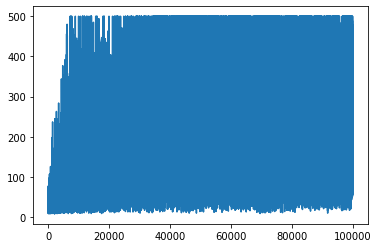

In [20]:
plt.plot(rewards)

מהגרף הזה, לא ניתן להסיק דבר, משום שבגלל טבעו של תהליך האימון הסטוכסטי, אורך סשני האימון משתנה מאוד. כדי להבין יותר את הגרף הזה, ניתן לחשב **ממוצע נע** על סדרת ניסויים, נניח 100. ניתן לעשות זאת בקלות באמצעות `np.convolve`:


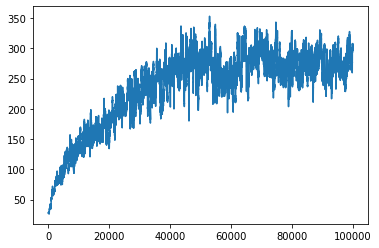

In [22]:
#code block 12

## שינוי היפרפרמטרים וצפייה בתוצאות בפעולה

עכשיו יהיה מעניין לראות איך המודל המאומן מתנהג בפועל. בואו נריץ את הסימולציה, ונשתמש באותה אסטרטגיית בחירת פעולות כמו במהלך האימון: דגימה בהתאם להתפלגות ההסתברויות ב-Q-Table:


In [23]:
# code block 13

## שמירת התוצאה כ-GIF מונפש

אם אתם רוצים להרשים את החברים שלכם, אולי תרצו לשלוח להם תמונת GIF מונפשת של מוט האיזון. כדי לעשות זאת, ניתן להפעיל את `env.render` ליצירת פריים תמונה, ולאחר מכן לשמור את הפריימים כ-GIF מונפש באמצעות ספריית PIL:


In [26]:
from PIL import Image
obs = env.reset()
done = False
i=0
ims = []
while not done:
   s = discretize(obs)
   img=env.render(mode='rgb_array')
   ims.append(Image.fromarray(img))
   v = probs(np.array([Qbest.get((s,a),0) for a in actions]))
   a = random.choices(actions,weights=v)[0]
   obs,_,done,_ = env.step(a)
   i+=1
env.close()
ims[0].save('images/cartpole-balance.gif',save_all=True,append_images=ims[1::2],loop=0,duration=5)
print(i)

360



---

**כתב ויתור**:  
מסמך זה תורגם באמצעות שירות תרגום מבוסס בינה מלאכותית [Co-op Translator](https://github.com/Azure/co-op-translator). בעוד שאנו שואפים לדיוק, יש לקחת בחשבון שתרגומים אוטומטיים עשויים להכיל שגיאות או אי-דיוקים. המסמך המקורי בשפתו המקורית נחשב למקור הסמכותי. למידע קריטי, מומלץ להשתמש בתרגום מקצועי על ידי מתרגם אנושי. איננו נושאים באחריות לכל אי-הבנה או פרשנות שגויה הנובעת משימוש בתרגום זה.
